In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sobre o Dataset

 - dados no qual os recursos são calculados a partir de uma imagem digitalizada de um aspirado por agulha fina (PAAF) de uma massa mamária. 
 - descrevem as características dos núcleos celulares presentes na imagem.
 
#### Informações

1) Número de Identificação

2) Diagnósticos: M - Malígno | B - Benígno

    a) raio (média das distâncias do centro aos pontos do perímetro).
    b) textura (desvio padrão dos valores de tons de cinza)
    c) perímetro
    d) área
    e) suavidade (variação local dos comprimentos dos raios)
    f) compacidade (perímetro^2 / área - 1,0)
    g) concavidade (gravidade das partes côncavas do contorno)
    h) pontos côncavos (número de porções côncavas do contorno)
    e) simetria
    j) dimensão fractal ("aproximação ao litoral" - 1).

In [24]:
data = pd.read_csv("../data/cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [26]:
# vamos começar realizando uma limpeza nos dados
data.drop(columns="Unnamed: 32", inplace=True)

In [28]:
# vamos colocar a coluna id como index do data frame
data.set_index('id', inplace=True)
data.index.name

'id'

In [50]:
# Vamos separa as features do target

X_raw = data.iloc[:, 1:]
y_raw = data.iloc[:, 0]

y_raw.name

'diagnosis'

In [51]:
# Vamos converter M e B para 1 e 0
y = pd.get_dummies(y_raw, drop_first=True)
y

,M
id,
842302,1
842517,1
84300903,1
84348301,1
84358402,1
...,...
926424,1
926682,1
926954,1


In [34]:
# vamos dar uma olhada nos nomes das colunas.
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

É fácil notar que temos três sufixos:

- _mean (média)
- _se (staandard deviation)
- _wrost (pior)

Para facilitar a análise, vamos separar estes três grupos. Para isso vamos usar o `loc` e passar como filtro `.str.contains(<expr>)` sobre as colunas de data.

In [38]:
mean_feat = data.loc[:, data.columns.str.contains('_mean')]
se_feat = data.loc[:, data.columns.str.contains('_se')]
worst_feat = data.loc[:, data.columns.str.contains('_worst')]

Agora podemos analisar cada um separadamente.

Vamos ver os dados estatísticos de cada um.

In [39]:
mean_feat.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


Vale notar que ao longo das colunas temos uma variação muito grande de valores, o que nos indica que o StandardScaler será necessário.

In [40]:
se_feat.describe()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795
std,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646
min,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895
25%,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248
50%,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187
75%,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558
max,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840


In [41]:
worst_feat.describe()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


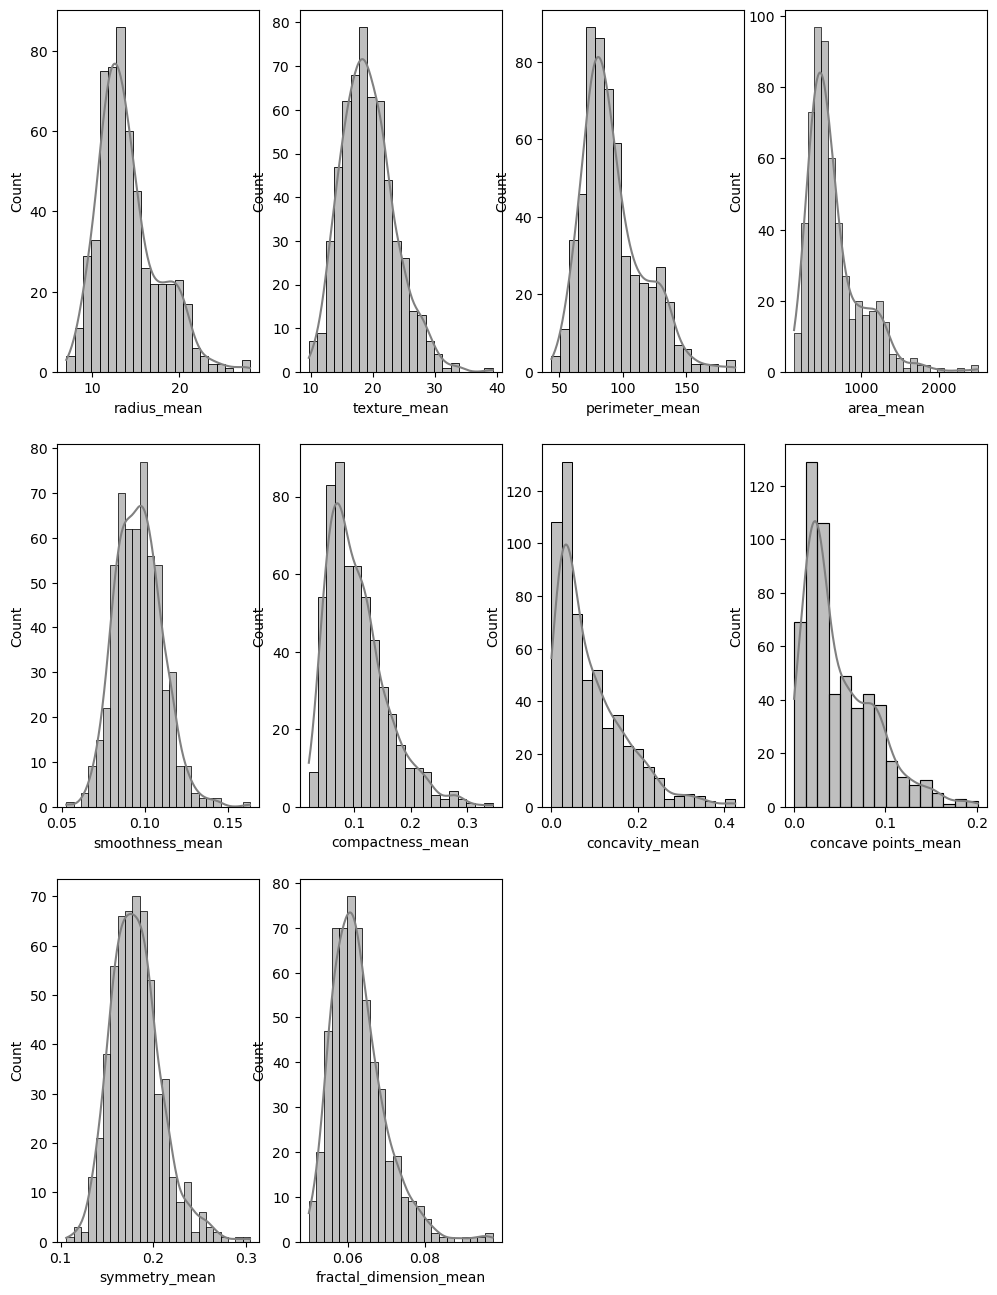

In [46]:
fig = plt.figure(figsize=(12, 16))
for i, col in enumerate(mean_feat):
    ax = fig.add_subplot(3, 4, i+1)
    sns.histplot( x=mean_feat[col], kde=True, color="gray", ax=ax) 

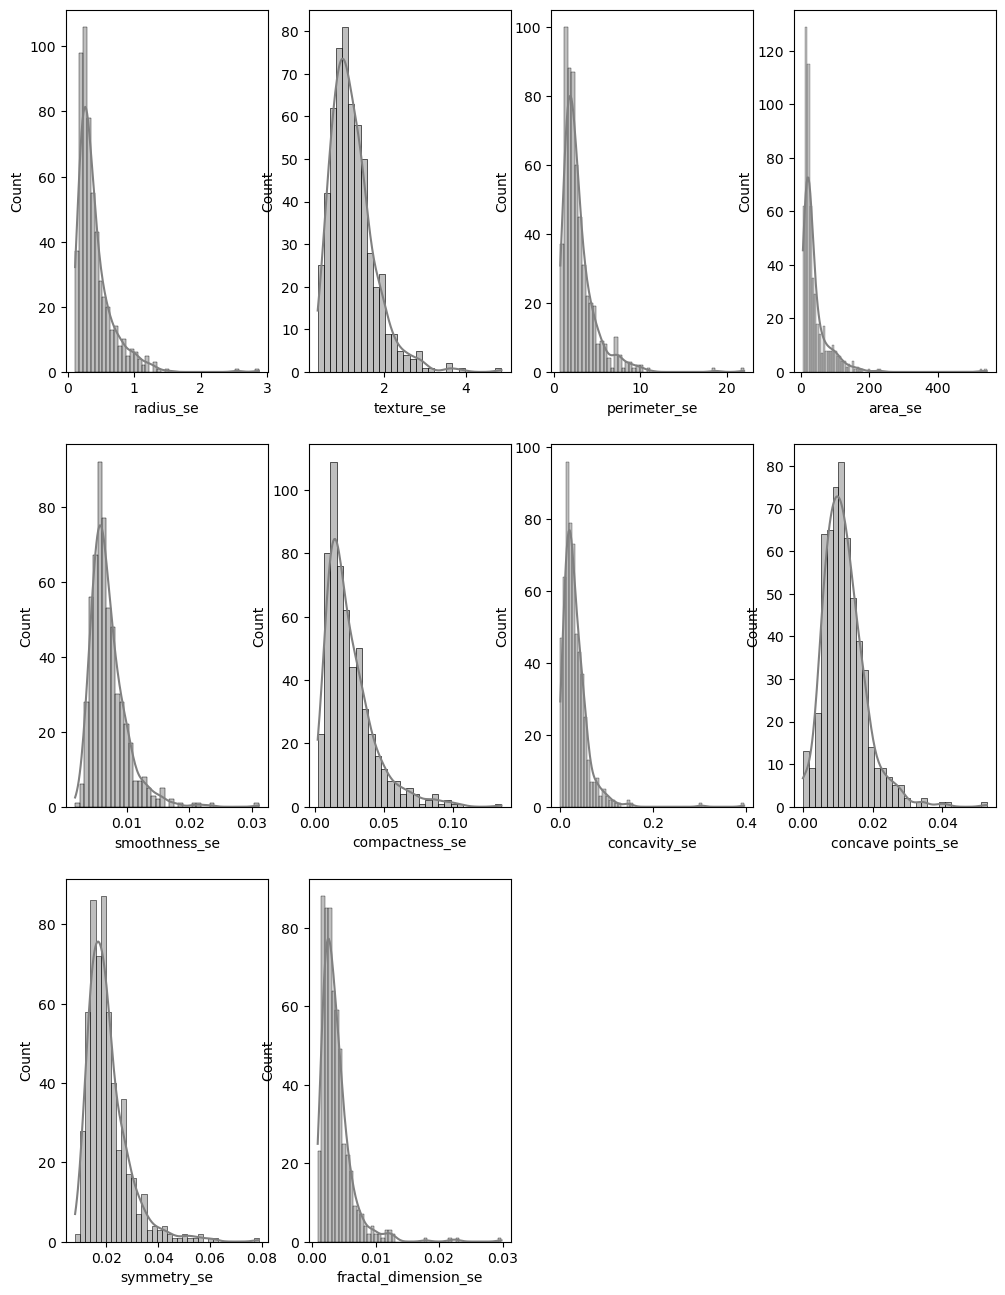

In [47]:
fig = plt.figure(figsize=(12, 16))
for i, col in enumerate(se_feat):
    ax = fig.add_subplot(3, 4, i+1)
    sns.histplot( x=se_feat[col], kde=True, color="gray", ax=ax) 

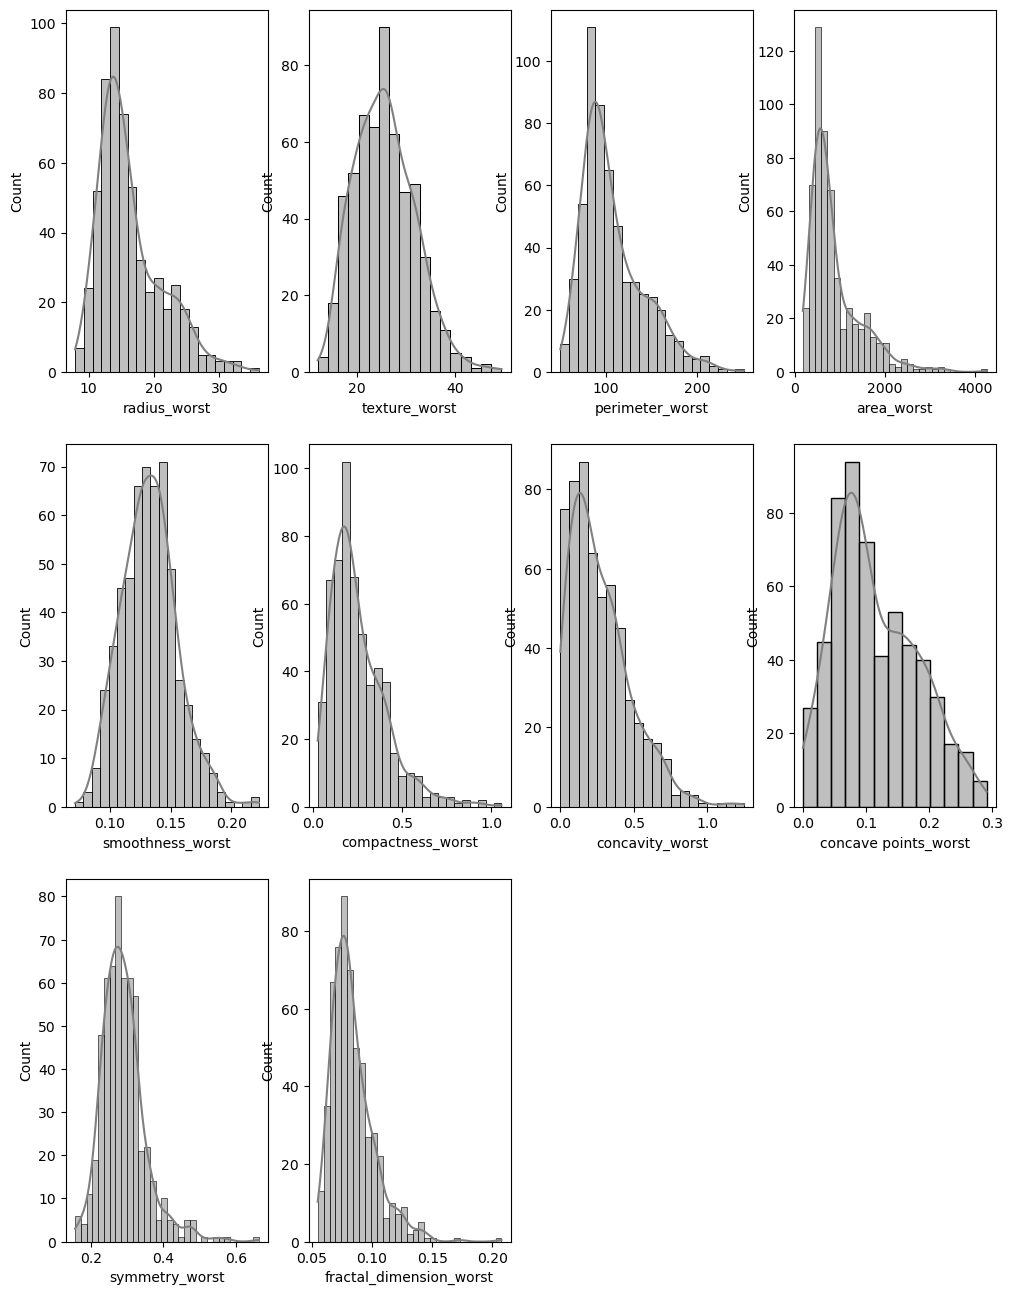

In [48]:
fig = plt.figure(figsize=(12, 16))
for i, col in enumerate(worst_feat):
    ax = fig.add_subplot(3, 4, i+1)
    sns.histplot( x=worst_feat[col], kde=True, color="gray", ax=ax) 

Note que todos as distribuições possuem uma calda mais longa para a direita.

Isso se justifica pelos outliers.

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

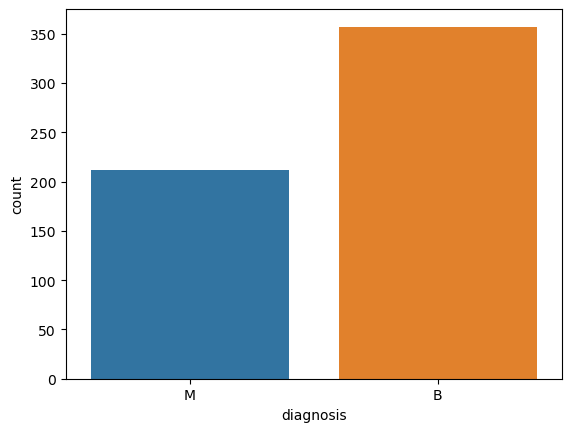

In [52]:
# Vamos comparar quantos diagnósticos de cada tipo temos
sns.countplot(x=y_raw)

# Análise de Correlações

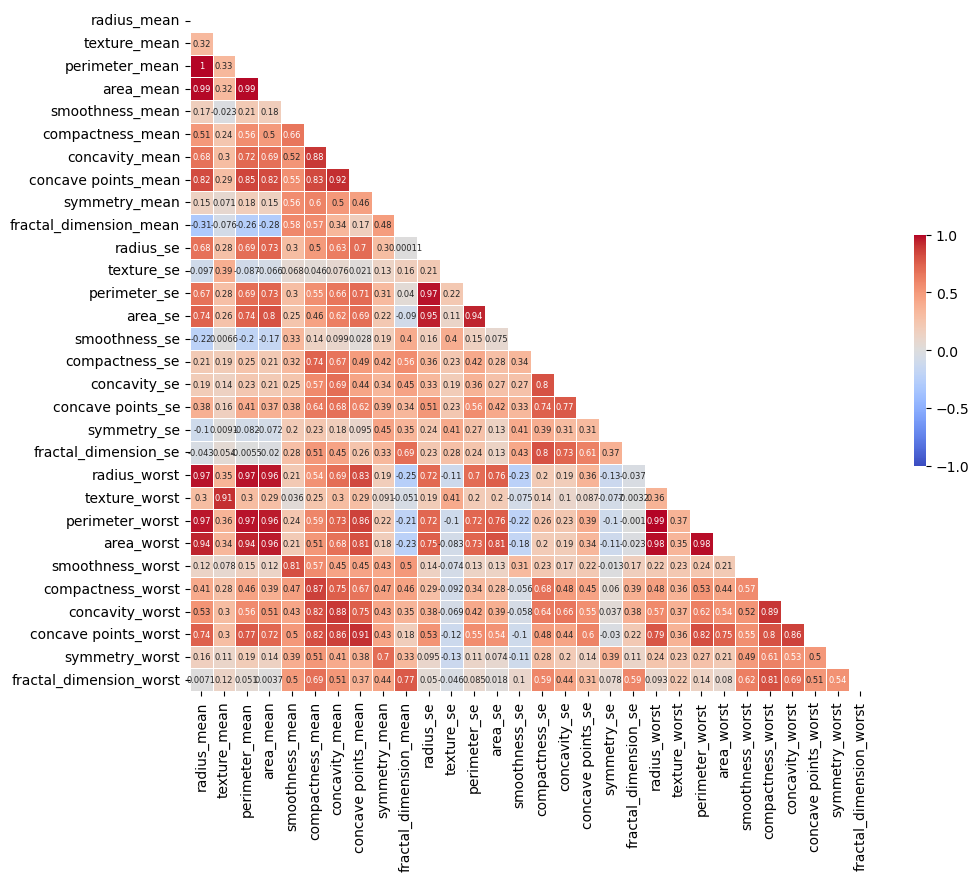

In [53]:
corr_matrix = data.corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .2, 
                                  'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 6})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [55]:
# Vamos criar dois dataframes: um para as correlações positivas e outro para as negativas
# isso irá facilitar a comparação

def get_positive_corr_coefficient(data, target):
    data_dummie = pd.concat([target, data], axis=1)    
    positive_corr_df = data_dummie.corr(method='pearson')
    positive_corr_df = positive_corr_df.mask(np.tril(np.ones(positive_corr_df.shape)).astype(bool))
    positive_corr_df = positive_corr_df[abs(positive_corr_df) > 0.7].stack().reset_index().sort_values(by=0, ascending=False)
    positive_corr_df.rename(columns={0: "pearson_coefficient"}, inplace=True)
    return positive_corr_df

def get_negative_corr_coefficient(data, target):
    data_dummie = pd.concat([target, data], axis=1)    
    negative_corr_df = data_dummie.corr(method='pearson')
    negative_corr_df = negative_corr_df.mask(np.tril(np.ones(negative_corr_df.shape)).astype(bool))
    negative_corr_df = negative_corr_df[abs(negative_corr_df) < 0.3].stack().reset_index().sort_values(by=0)
    negative_corr_df.rename(columns={0: "pearson_coefficient"}, inplace=True)
    return negative_corr_df

In [63]:
positive_corr = get_positive_corr_coefficient(X_raw, y)
positive_corr.head(10)

,level_0,level_1,pearson_coefficient
8,radius_mean,perimeter_mean,0.997855
68,radius_worst,perimeter_worst,0.993708
9,radius_mean,area_mean,0.987357
17,perimeter_mean,area_mean,0.986507
69,radius_worst,area_worst,0.984015
71,perimeter_worst,area_worst,0.977578
52,radius_se,perimeter_se,0.972794
22,perimeter_mean,perimeter_worst,0.970387
12,radius_mean,radius_worst,0.969539
21,perimeter_mean,radius_worst,0.969476


In [64]:
# vamos ver quais possuem a maior correlação com a variável target
# São estas variáveis que vamos usar no nosso modelo.
mask_corr_M = positive_corr["level_0"] == "M"
positive_corr.loc[positive_corr["level_0"] == "M"]

,level_0,level_1,pearson_coefficient
7,M,concave points_worst,0.793566
5,M,perimeter_worst,0.782914
3,M,concave points_mean,0.776614
4,M,radius_worst,0.776454
1,M,perimeter_mean,0.742636
6,M,area_worst,0.733825
0,M,radius_mean,0.730029
2,M,area_mean,0.708984


In [65]:
# Mesma análise para as correlações negativas
negative_corr = get_negative_corr_coefficient(X_raw, y)
negative_corr.head(10)

,level_0,level_1,pearson_coefficient
52,area_mean,fractal_dimension_mean,-0.283110
40,perimeter_mean,fractal_dimension_mean,-0.261477
98,fractal_dimension_mean,radius_worst,-0.253691
101,fractal_dimension_mean,area_worst,-0.231854
145,smoothness_se,radius_worst,-0.230691
10,radius_mean,smoothness_se,-0.222600
147,smoothness_se,perimeter_worst,-0.217304
100,fractal_dimension_mean,perimeter_worst,-0.205151
42,perimeter_mean,smoothness_se,-0.202694
148,smoothness_se,area_worst,-0.182195


In [66]:
# vamos filtrar
mask_corr_M = negative_corr["level_0"] == "M"
negative_corr.loc[negative_corr["level_0"] == "M"] 

,level_0,level_1,pearson_coefficient
2,M,smoothness_se,-0.067016
0,M,fractal_dimension_mean,-0.012838
1,M,texture_se,-0.008303
5,M,symmetry_se,-0.006522
6,M,fractal_dimension_se,0.077972
4,M,concavity_se,0.253730
3,M,compactness_se,0.292999


# Atividade da aula

Agora que já fizemos uma análise do dataset e determinamos que variáveis usar nos modelos, vamos passar para a parte de construção de modelos de ML.

Roteiro:

1. Realize o StandardScaling sobre as features
2. Use o `train_test_split()` para gerar os dados de treino e de test
3. Use os mesmos passos da atividade da aula passada para construir um modelo para obter o melhor classificador para o nosso problema


Ajuda: use o `selected_feats` abaixo nos seus modelos.

In [67]:
selected_feats = ["concave points_worst", "perimeter_worst", "concave points_mean",
                  "radius_worst", "perimeter_mean", "area_worst", "radius_mean",
                  "area_mean"]